## 机器学习

数据建模在机器学习中具有极其重要的地位。它是机器学习的核心组成部分，对于训练和评估模型、做出预测和优化决策都至关重要。

模型训练和学习：在机器学习中，模型通过从数据中学习模式和关系来进行训练。模型的性能和准确性取决于所用数据的质量和数量。良好的数据建模可以提供高质量的训练数据，有助于构建更准确和可靠的模型。

**机器学习的一般框架**
1. 选择模型： 根据问题的性质，选择适当的机器学习模型。例如，对于分类问题，可以选择支持向量机、决策树、随机森林等。
2. 划分数据集： 将数据集分为训练集和测试集，以便评估模型的性能。通常，80%的数据用于训练，20%用于测试。
3. 训练模型： 使用训练数据集来拟合模型。
4. 评估模型： 使用测试数据集评估模型性能。
5. 调优模型： 根据模型性能进行调优，可能需要调整模型超参数、使用交叉验证等。
6. 预测： 使用训练好的模型进行新数据的预测。

### 题目一、以鸢尾花数据集为例学习 SVM 
1. 加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42
2. 创建并训练 SVM 模型，使用线性核函数，随机种子42（也可以自己调试、体验不同参数的作用，选择更好的值，注释明确即可）
3. 使用 Accuracy、Recall、F1 Score、Confusion Matri 这四个评估指标来评估实验效果

In [13]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pre = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pre)
recall = recall_score(y_test, y_pre, average='weighted')
f1 = f1_score(y_test, y_pre, average='weighted')
conf = confusion_matrix(y_test, y_pre)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("\nConfusion Matrix:\n",conf)
print("\n如上，accuracy,recall,f1 socre的值都是100%。并且confusion矩阵是一个对角阵,说明了svm拟合的直线十分符合要求")




Accuracy: 100.00%
Recall: 100.00%
F1 Score: 100.00%

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

如上，accuracy,recall,f1 socre的值都是100%。并且confusion矩阵是一个对角阵,说明了svm拟合的直线十分符合要求


#### SVM 基本概念  

将实例的特征向量（以二维为例）映射为空间中的一些点，如下图的实心点和空心点，它们属于不同的两类。SVM 的目的就是想要画出一条线，以“最好地”区分这两类点，以至如果以后有了新的点，这条线也能做出很好的分类。

支持向量机（support vector machines，SVM）是一种二分类模型，它将实例的特征向量映射为空间中的一些点，SVM 的目的就是想要画出一条线，以 “最好地” 区分这两类点，以至如果以后有了新的点，这条线也能做出很好的分类。SVM 适合中小型数据样本、非线性、高维的分类问题。

SVM 是有监督的学习模型，就是说我们需要先对数据打上标签，之后通过求解最大分类间隔来求解二分类问题，而对于多分类问题，可以组合多个 SVM 分类器来处理。

![image](https://github.com/X-lab2017/OpenTEA101/assets/115639837/f85c6a50-aca5-44d9-85e0-d1a6b4b57280)

### 题目二、以新闻数据分类为例 学习朴素贝叶斯
1. 导入库与数据集，数据集的导入方式：from sklearn.datasets import fetch_20newsgroups
2. 查看类别标签、数据集的描述、数据样本
3. 将文本数据转换为词袋模型
4. 将数据集分为训练集和测试集，训练集比例0.2，随机种子42
5. 创建并训练朴素贝叶斯分类器
6. 使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果
7. 横坐标为 Predicted，纵坐标为 Actual，画出混淆矩阵Confusion Matrix


Accuracy: 87.43%
Recall: 87.43%
F1 Score: 86.92%


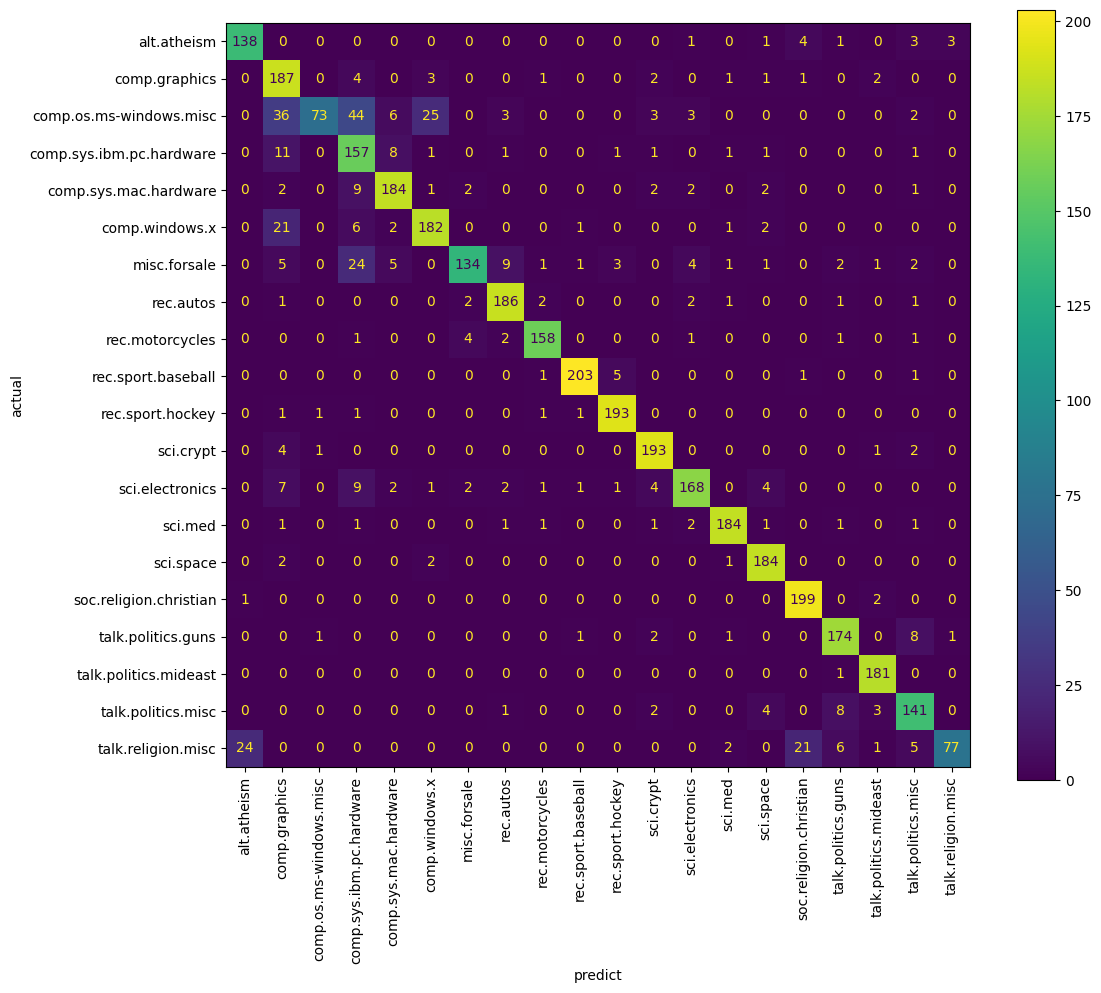

In [21]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
dataset = fetch_20newsgroups(subset='all')

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataset.data)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NBC = MultinomialNB()
NBC.fit(X_train, y_train)
y_pre = NBC.predict(X_test)

accuracy = accuracy_score(y_test, y_pre)
recall = recall_score(y_test, y_pre, average='weighted')
f1 = f1_score(y_test, y_pre, average='weighted')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

conf = confusion_matrix(y_test, y_pre)

disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=dataset.target_names)
fig, ax = plt.subplots(figsize=(12, 10))
disp.plot(ax=ax, xticks_rotation='vertical')
plt.xlabel("predict")
plt.ylabel("actual")
plt.show()

#### 朴素贝叶斯基本概念  

朴素贝叶斯（Naive Bayes）是一种基于贝叶斯定理的统计学分类方法。它被广泛应用于机器学习和数据挖掘领域，特别是在文本分类和垃圾邮件过滤等任务中取得了很好的效果。

![image](https://github.com/hypertrons/hypertrons-crx/assets/50283262/6b01a8df-b83d-48a2-a13f-9dfe60335f9e)

## 聚类分析

聚类是一种无监督学习的方法，旨在将数据集中的样本分组（或簇）成相似的集合，使得同一组内的样本相互之间更相似，而不同组之间的样本更不相似。

聚类是发现数据内在结构的一种方法，它能够帮助我们理解数据的组织、发现隐藏的模式以及从数据中提取有用的信息。

### 题目三、以鸢尾花数据集为例 学习k-means聚类
1. 导入数据集和聚类库
2. 使用k-means聚类，将数据分为3个簇，设置随机种子为0
3. PCA 降维到2维空间后，输出可视化结果
4. 尝试先降维，再聚类，再输出可视化结果，比较两次的不同
5. 使用轮廓系数比较聚类效果
6. 绘制轮廓系数与聚类数的关系图

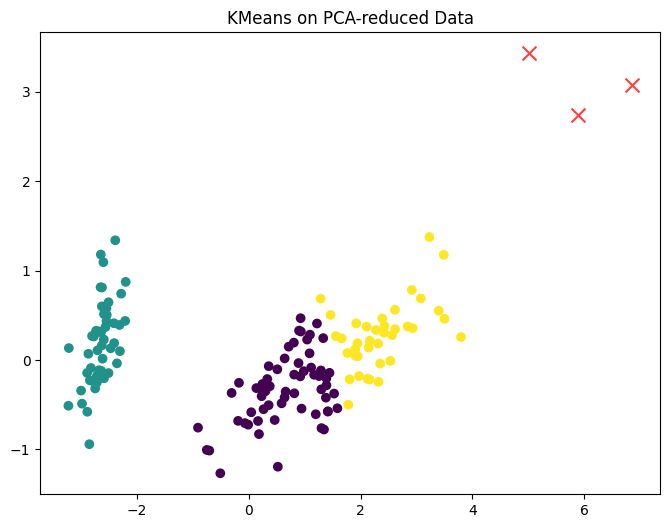

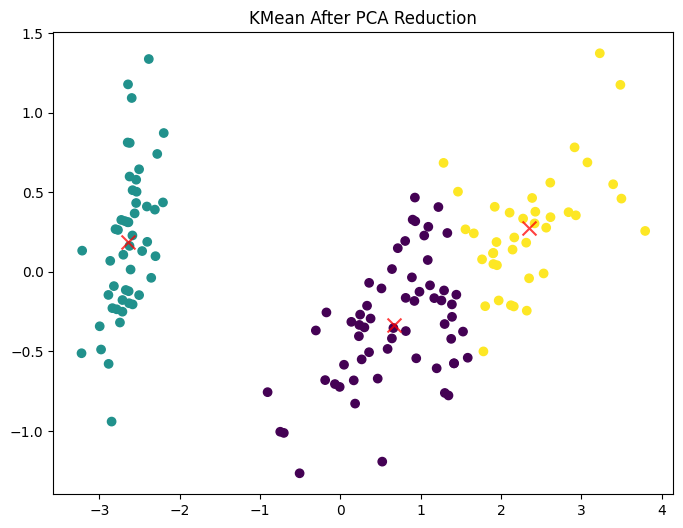

Silhouette Score (Original): 0.5512
Silhouette Score (After PCA): 0.5977
For n_clusters = 2, The average silhouette_score is : 0.6810
For n_clusters = 3, The average silhouette_score is : 0.5512
For n_clusters = 4, The average silhouette_score is : 0.4981
For n_clusters = 5, The average silhouette_score is : 0.4610
For n_clusters = 6, The average silhouette_score is : 0.3357


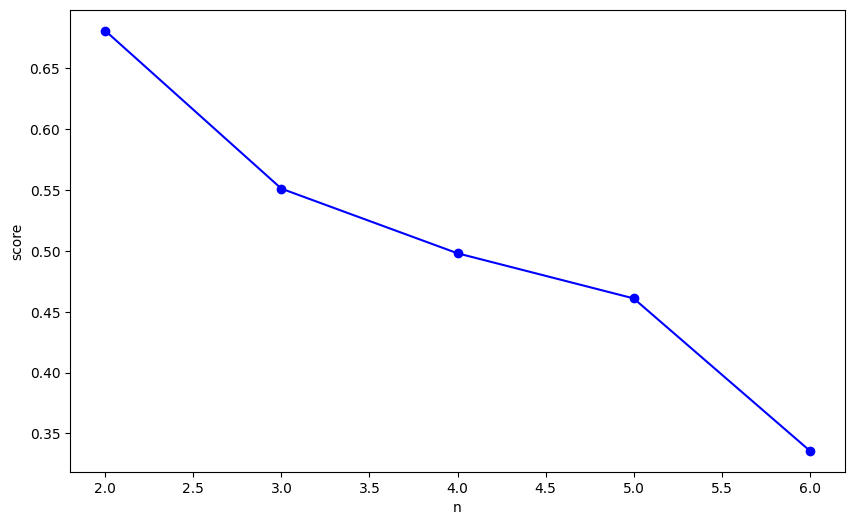

In [23]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns
iris = datasets.load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(data=X, columns=iris.feature_names)

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
pca = PCA(n_components=2)
X_2 = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_2[:, 0], X_2[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75, marker='x')  # 绘制质心
plt.title('KMeans on PCA-reduced Data')
plt.show()

kmeans_2 = KMeans(n_clusters=3, random_state=0).fit(X_2)
labels_2 = kmeans_2.labels_
centers_2 = kmeans_2.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X_2[:, 0], X_2[:, 1], c=labels_2, cmap='viridis', marker='o')
plt.scatter(centers_2[:, 0], centers_2[:, 1], c='red', s=100, alpha=0.75, marker='x')
plt.title('KMean After PCA Reduction')
plt.show()

score = silhouette_score(X, labels)
score_2 = silhouette_score(X_2, labels_2)

print(f"Silhouette Score (Original): {score:.4f}")
print(f"Silhouette Score (After PCA): {score_2:.4f}")

range_n = [2, 3, 4, 5, 6]
scores = []

for n in range_n:
    kmean = KMeans(n_clusters=n, random_state=0)
    label = kmean.fit_predict(X)
    avg = silhouette_score(X, label)
    scores.append(avg)
    print(f"For n_clusters = {n}, The average silhouette_score is : {avg:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range_n, scores, 'bo-')
plt.xlabel('n')
plt.ylabel('score')
plt.show()

**轮廓系数（Silhouette Coefficient）** 是一种用于度量数据点与其自身簇内数据的相似度与与最近的相邻簇的数据点的不相似度的指标。

1. 对于每个样本，计算它与同簇内所有其他点的平均距离（称为簇内平均距离，a）。

2. 对于每个样本，计算它与最近的不同簇内所有点的平均距离（称为簇间平均距离，b）。

3. 计算轮廓系数（S）：

​![image](https://github.com/hypertrons/hypertrons-crx/assets/50283262/6f26e49d-f738-4f41-998b-75e4870829f2)

轮廓系数的取值范围在[-1, 1]之间：

- 如果 S 接近1，表示样本与自身簇内的其他样本相似度高，与其他簇内的样本不相似，聚类效果好。
- 如果 S 接近-1，表示样本与自身簇内的其他样本相似度低，与其他簇内的样本相似度高，聚类效果差。